In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from tabulate import tabulate
np.set_printoptions(precision=6) #Mostrar numeros con maximo seis digitos de precision
np.set_printoptions(suppress=True) # Suprimir uso de notacion cientifica para numeros muy pequenos

In [2]:
N = 23 # Numero de periodos
mYah = 0 # Numero de acciones extraidas de Yahoo
mFin = 6 # Numero de acciones extraidas de Finance.com
m = mYah + mFin # Numero de acciones

precios = np.zeros((m, N+1))
retornos = np.zeros((m, N))

Extrayendo columnas de los archivos de Yahoo Finance:

In [3]:
archivosYahoo = ['csvs/EC.csv','csvs/CIB.csv']

In [4]:
for k in range(mYah):
    archivo = archivosYahoo[k]
    lector = csv.reader(open(archivo))
    lector.__next__() #Ignorar primer renglon
    
    for i in range(N+1):
        precios[k, i] = lector.__next__()[5] #Extraer la 5ta columna: precio de cierre ajustado
        if (i > 0):
            retornos[k, i-1] = (precios[k, i] - precios[k, i-1])/precios[k, i-1]

Extrayendo columnas de los archivos de Investing.com

In [5]:
 archivosFin = [ 'csvs/CFV-2.csv', 'csvs/FTSE-2.csv', 'csvs/IMI-2.csv', 'csvs/BIC_p1-2.csv', 'csvs/MAS-2.csv', 'csvs/PMG-2.csv']

In [6]:
for k in range(mYah, mYah + mFin):
    archivo = archivosFin[k - mYah]
    lector = csv.reader(open(archivo))
    lector.__next__() #Ignorar primer renglon
    
    for i in range(N, -1, -1):
        precios[k, i] = lector.__next__()[1] #Extraer la 1era columna: precio de cierre
        if (i < N):
            retornos[k, i] = (precios[k, i+1] - precios[k, i])/precios[k, i]

In [7]:
np.shape(retornos)

(6, 23)

TODO: Explicar, a la luz de la lectura 1, la naturaleza de esos activos.

# 3

Vector de Rendimientos promedio

In [8]:
retProm = np.mean(retornos, 1, keepdims = True) # Hallar el promedio de la matriz de retornos a lo largo del eje temporal

print("Tamaño de matriz de rentabilidades:", np.shape(retProm)) # En efecto el vector retProm tiene tamaño 7x1, donde 7 es el número de activos
print("Retornos promedio:\n", retProm)

Tamaño de matriz de rentabilidades: (6, 1)
Retornos promedio:
 [[0.001484]
 [0.010866]
 [0.005016]
 [0.019599]
 [0.018384]
 [0.003606]]


Matriz de Covarianzas

In [9]:
S = np.zeros((m, m)) # Inicializacion en 0's

for k in range(m): # Iterar con k sobre activos
    for l in range(m): # Iterar con l sobre activos
        for i in range(N): # Iterar sobre el tiempo con i
            # Para la combinacion de activos k y l se suma la contribución a la covarianza por el tiempo i
            S[k, l] += (retornos[k, i] - retProm[k])*(retornos[l, i] - retProm[l]) 
            
print("Matriz de covarianzas:\n", S)

Matriz de covarianzas:
 [[ 0.195841  0.069729  0.070606  0.066326  0.016321 -0.037663]
 [ 0.069729  0.053816  0.042587  0.049801  0.0114   -0.005918]
 [ 0.070606  0.042587  0.083977  0.040482  0.027572 -0.010649]
 [ 0.066326  0.049801  0.040482  0.071042  0.008762 -0.019772]
 [ 0.016321  0.0114    0.027572  0.008762  0.139274 -0.01058 ]
 [-0.037663 -0.005918 -0.010649 -0.019772 -0.01058   0.17264 ]]


In [10]:
varianzas = np.array([S[i, i] for i in range(m)]).reshape((m, 1))
desvs = np.sqrt(varianzas)

print("\nVarianzas:\n", varianzas)


def varPort(x): # Funcion de calculo de varianza de un portafolio
    return x.T.dot(S).dot(x)[0,0]

print(varPort(np.array([1,0,0,0,0,0]).reshape(m,1))) # Verificacion de que la funcion varPort funciona
print(varPort(np.array([0,0,0,1,0,0]).reshape(m,1))) # Verificacion de que la funcion varPort funciona


Varianzas:
 [[0.195841]
 [0.053816]
 [0.083977]
 [0.071042]
 [0.139274]
 [0.17264 ]]
0.19584112918255894
0.07104186962683787


## Matriz de Covarianzas es Definida Positiva

### Matriz Cuadrada

In [11]:
np.shape(S)

(6, 6)

### Simétrica

In [12]:
S - S.transpose() # Debería ser igual a su transpuesta,  y lo es pues su diferencia es 0

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

### Definida Positiva

Usamos la caracterización vista en clase: los subdeterminantes en línea son positivos. En particular vemos que el determinante de la matriz es distinto de $0$.

In [13]:
for k in range(1,m):
    submatPpal = S[:k, :k]
    detp = np.linalg.det(submatPpal)
    print("El determinante de la submatriz  de tamaño ", np.shape(submatPpal), " que contiene la entrada 1,1, es decir la matriz\n", submatPpal, " es ", detp, "!= 0\n")

El determinante de la submatriz  de tamaño  (1, 1)  que contiene la entrada 1,1, es decir la matriz
 [[0.195841]]  es  0.19584112918255894 != 0

El determinante de la submatriz  de tamaño  (2, 2)  que contiene la entrada 1,1, es decir la matriz
 [[0.195841 0.069729]
 [0.069729 0.053816]]  es  0.005677203963545524 != 0

El determinante de la submatriz  de tamaño  (3, 3)  que contiene la entrada 1,1, es decir la matriz
 [[0.195841 0.069729 0.070606]
 [0.069729 0.053816 0.042587]
 [0.070606 0.042587 0.083977]]  es  0.0002726227402310885 != 0

El determinante de la submatriz  de tamaño  (4, 4)  que contiene la entrada 1,1, es decir la matriz
 [[0.195841 0.069729 0.070606 0.066326]
 [0.069729 0.053816 0.042587 0.049801]
 [0.070606 0.042587 0.083977 0.040482]
 [0.066326 0.049801 0.040482 0.071042]]  es  6.791507175274476e-06 != 0

El determinante de la submatriz  de tamaño  (5, 5)  que contiene la entrada 1,1, es decir la matriz
 [[0.195841 0.069729 0.070606 0.066326 0.016321]
 [0.069729 0.0

In [14]:
Sinv = np.linalg.inv(S)
print(Sinv)

[[ 10.430682 -11.308413  -3.160588   0.428515   0.436429   1.768793]
 [-11.308413  77.940575 -11.792222 -38.667086  -0.666807  -4.992232]
 [ -3.160588 -11.792222  21.967337  -0.943654  -2.956     -0.027958]
 [  0.428515 -38.667086  -0.943654  42.208544   0.919857   3.600403]
 [  0.436429  -0.666807  -2.956      0.919857   7.74657    0.470119]
 [  1.768793  -4.992232  -0.027958   3.600403   0.470119   6.446605]]


In [15]:
S.dot(Sinv)

array([[ 1.,  0., -0.,  0.,  0., -0.],
       [-0.,  1., -0., -0.,  0., -0.],
       [-0., -0.,  1., -0., -0., -0.],
       [-0., -0.,  0.,  1., -0.,  0.],
       [-0., -0.,  0., -0.,  1.,  0.],
       [ 0., -0.,  0.,  0., -0.,  1.]])

# 4

Parámetros de la teoría

In [16]:
u = np.ones((m, 1))

A = u.T.dot(Sinv.dot(u))[0,0]
B = u.T.dot(Sinv.dot(retProm))[0,0]
C = retProm.T.dot(Sinv.dot(retProm))[0,0]
D = A*C - B**2

print("A =", A, "\t B =", B, "\t C =", C, ", entonces D =", D)

A = 32.958628128159624 	 B = 0.41113541046705426 	 C = 0.010439302986027235 , entonces D = 0.1750327792937448


# 5

Ecuación general de los portafolios óptimos dados los parámetros de la teoría $A, B, C$ y el parámetro $\mu$: $x*(\mu) = (\frac{C - B\mu}{D}) S^{-1} \hat u + (\frac{A \mu - B}{D})S^{-1}\bar r$, en nuestro caso, como:

In [17]:
def xOptMu(mu): # Funcion para calculo del portafolio optimo dado parametro mu. Devuelve matrix mx1
    return ((C - B*mu)/D) * Sinv.dot(u) + ((A*mu - B)/D) * Sinv.dot(retProm)


#Test para ver que xOptMu funciona bien: comprobar que en mu = B/A se halla el portafolio optimo
#print(xOptMu(B/A)) # Portafolio calculado
#print(1/A * Sinv.dot(u)) # Portafolio optimo teorico
# print(varPort(xOptMu(B/A)), 1/A) # Varianzas calculadas y teorica

rentDeseadas = np.linspace(0., 0.03, 9)

portOptMu = np.zeros( (m, len(rentDeseadas)) )

for i in range(len(rentDeseadas)):
    portOptMu[:,i] = xOptMu(rentDeseadas[i]).flatten()
    
print("\t\t PORTAFOLIOS EFICIENTES")
print("Cada fila corresponde a un activo y cada columna a un valo de mu distinto\n")
print(tabulate(portOptMu, rentDeseadas))

		 PORTAFOLIOS EFICIENTES
Cada fila corresponde a un activo y cada columna a un valo de mu distinto

       0.0     0.00375      0.0075     0.01125       0.015     0.01875      0.0225     0.02625        0.03
----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
 0.15218     0.0936206   0.0350612  -0.0234982  -0.0820576  -0.140617   -0.199176   -0.257736   -0.316295
 0.667353    0.562632    0.457911    0.353189    0.248468    0.143747    0.0390256  -0.0656957  -0.170417
 0.40858     0.313909    0.219239    0.124568    0.0298975  -0.0647732  -0.159444   -0.254114   -0.348785
-0.566745   -0.327538   -0.0883313   0.150876    0.390083    0.62929     0.868497    1.1077      1.34691
 0.0243601   0.071309    0.118258    0.165207    0.212156    0.259105    0.306053    0.353002    0.399951
 0.314272    0.286067    0.257863    0.229658    0.201454    0.173249    0.145044    0.11684     0.0886353


En todos los portafolios hay posiciones en corto para al menos un activo.

# 6

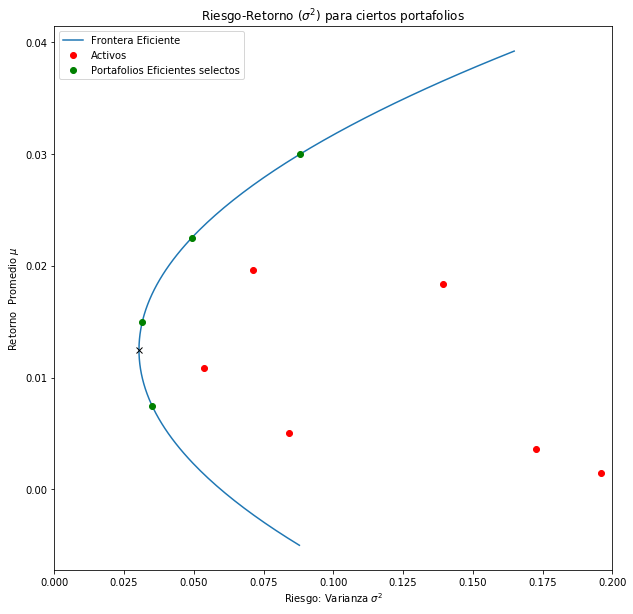

In [81]:
mus = np.linspace(-0.005, 2*np.max(retProm), 200)
varFront = (A*mus**2 - 2*mus*B + C)/D

plt.figure(figsize = (10,10))
plt.title("Riesgo-Retorno ($\sigma^2$) para ciertos portafolios")

plt.xlabel("Riesgo: Varianza $\sigma^2$")
plt.ylabel("Retorno  Promedio $\mu$")

plt.xlim(left = 0, right = 0.2)

# Frontera eficiente
plt.plot(varFront, mus) 

# Activos elegidos
plt.plot(varianzas, retProm, 'ro') 

# 4 Portafolios Eficientes
musElegidos = [rentDeseadas[2], rentDeseadas[4], rentDeseadas[6], rentDeseadas[8]]
portElegidos = [xOptMu(mu).reshape(m,1) for mu in musElegidos]
varElegidos = [varPort(xOptMu(mu)) for mu in musElegidos]

plt.plot(varElegidos, musElegidos, 'go')

plt.plot(1/A, B/A, 'kx')

plt.legend(("Frontera Eficiente", "Activos", "Portafolios Eficientes selectos"), loc = "upper left")

# 7

### Calculo de la tasa libre de riesgo correspondiente a cada portafolio eficiente, es decir el corte de su linea de mercado con el eje de rentabilidad.

Funciones Ayudantes

In [49]:
def muPort(port): # Funcion que calcula la rentabilidad promedio de un portafolio
    return port.T.dot(retProm)[0,0]

def tauMu(mu): # Funcion que convierte una rentabilidad de un portafolio de mercado en una tasa libre de riesgo
    return (mu*B - C)/(mu*A - B)

# Verificacion de que la funcion que calucula el rendimiento de un portafolio funciona
#print(muPort(np.array([1, 0, 0, 0, 0, 0]).reshape(m, 1))) #0.0014838
#print(muPort(np.array([0, 0, 0, 0, 1, 0]).reshape(m, 1))) #0.018384

# Verificacion de que tauMu es calculado correctamente
#print(tauMu(muPort(portOptMu[:,8].reshape(m, 1))))
#print(tauMu(100))
#print(B/A)

Cálculo de los $\tau$s correspondientes a los valores de $\mu$ escogidos:

In [46]:
tausCalculados = [tauMu(mu) for mu in musElegidos]

El portafolio eficiente para el cual se está graficando su línea de mercado y tasa libre de riesgo es: [[ 0.035061]
 [ 0.457911]
 [ 0.219239]
 [-0.088331]
 [ 0.118258]
 [ 0.257863]]
El cual tiene un rendimiento promedio de:  0.0075 una varianza de 0.03500027072614352 y le corresonde una tasa libre de riesgo de 0.04486721780257211


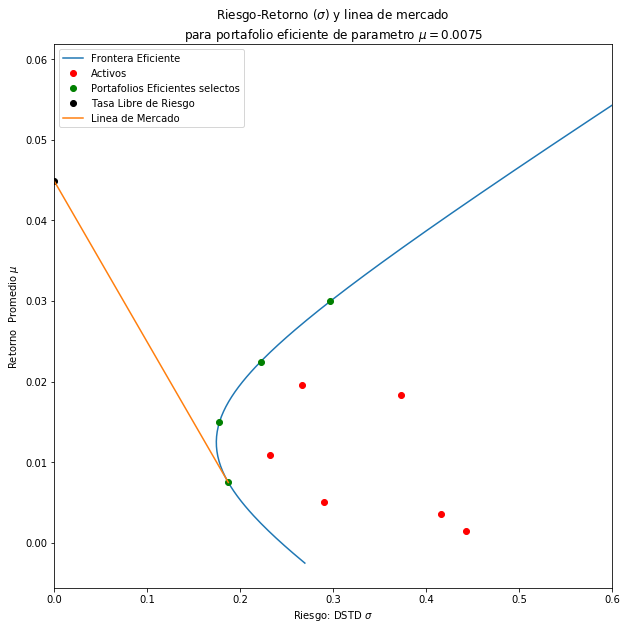

In [97]:
mus = np.linspace(-0.0025, 3*np.max(retProm), 200)
stdFront = np.sqrt((A*mus**2 - 2*mus*B + C)/D)

    # PRIMER PORTAFOLIO 

i = 0 #Indice para el portafolio actual
mu = musElegidos[i]
port = portElegidos[i]
var = varPort(port)
std = np.sqrt(var)
tau = tauMu(mu)
    
print("El portafolio eficiente para el cual se está graficando su línea de mercado y tasa libre de riesgo es:", 
      xOptMu(musElegidos[i]))
print("El cual tiene un rendimiento promedio de: ", mu, 
      "una varianza de", var,
      "y le corresonde una tasa libre de riesgo de", tau)


plt.figure(figsize = (10,10))
plt.title("Riesgo-Retorno ($\sigma$) y linea de mercado \npara portafolio eficiente de parametro $\mu=$" + str(mu))

plt.xlabel("Riesgo: DSTD $\sigma$")
plt.ylabel("Retorno  Promedio $\mu$")

plt.xlim(left = 0, right = 0.6)

# Frontera eficiente
plt.plot(stdFront, mus)

# Activos elegidos
plt.plot(np.sqrt(varianzas), retProm, 'ro') 

# 4 Portafolios Eficientes
plt.plot(np.sqrt(varElegidos), musElegidos, 'go')

# LINEA DE MERCADO Y CORTE CON EL EJE DE RENDIMIENTOS: TASA LIBRE DE RIESGO
plt.plot([0], [tau], 'ko')
plt.plot([0, np.sqrt(var)], [tau, mu])

plt.legend(("Frontera Eficiente", "Activos", "Portafolios Eficientes selectos", 
            "Tasa Libre de Riesgo", "Linea de Mercado"), loc = "upper left")

El portafolio eficiente para el cual se está graficando su línea de mercado y tasa libre de riesgo es: [[-0.082058]
 [ 0.248468]
 [ 0.029897]
 [ 0.390083]
 [ 0.212156]
 [ 0.201454]]
El cual tiene un rendimiento promedio de:  0.015 una varianza de 0.0315422746706555 y le corresonde una tasa libre de riesgo de -0.05132227236926789


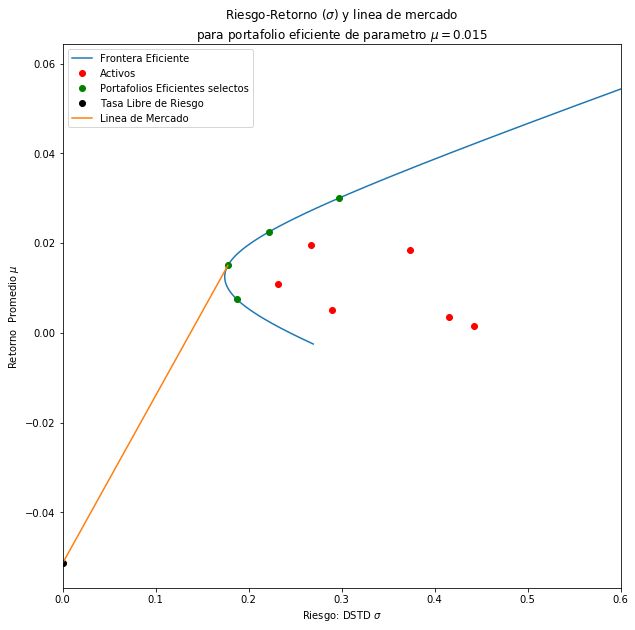

In [98]:
mus = np.linspace(-0.0025, 3*np.max(retProm), 200)
stdFront = np.sqrt((A*mus**2 - 2*mus*B + C)/D)

    # SEGUNDO PORTAFOLIO 

i = 1 #Indice para el portafolio actual
mu = musElegidos[i]
port = portElegidos[i]
var = varPort(port)
std = np.sqrt(var)
tau = tauMu(mu)
    
print("El portafolio eficiente para el cual se está graficando su línea de mercado y tasa libre de riesgo es:", 
      xOptMu(musElegidos[i]))
print("El cual tiene un rendimiento promedio de: ", mu, 
      "una varianza de", var,
      "y le corresonde una tasa libre de riesgo de", tau)


plt.figure(figsize = (10,10))
plt.title("Riesgo-Retorno ($\sigma$) y linea de mercado \npara portafolio eficiente de parametro $\mu=$" + str(mu))

plt.xlabel("Riesgo: DSTD $\sigma$")
plt.ylabel("Retorno  Promedio $\mu$")

plt.xlim(left = 0, right = 0.6)

# Frontera eficiente
plt.plot(stdFront, mus)

# Activos elegidos
plt.plot(np.sqrt(varianzas), retProm, 'ro') 

# 4 Portafolios Eficientes
plt.plot(np.sqrt(varElegidos), musElegidos, 'go')

# LINEA DE MERCADO Y CORTE CON EL EJE DE RENDIMIENTOS: TASA LIBRE DE RIESGO
plt.plot([0], [tau], 'ko')
plt.plot([0, np.sqrt(var)], [tau, mu])

plt.legend(("Frontera Eficiente", "Activos", "Portafolios Eficientes selectos", 
            "Tasa Libre de Riesgo", "Linea de Mercado"), loc = "upper left")

El portafolio eficiente para el cual se está graficando su línea de mercado y tasa libre de riesgo es: [[-0.199176]
 [ 0.039026]
 [-0.159444]
 [ 0.868497]
 [ 0.306053]
 [ 0.145044]]
El cual tiene un rendimiento promedio de:  0.0225 una varianza de 0.04926800019794224 y le corresonde una tasa libre de riesgo de -0.0035975633534763613


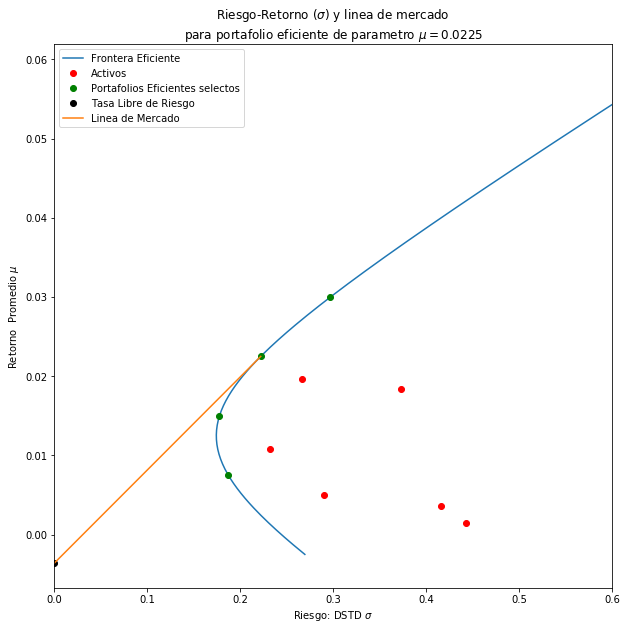

In [101]:
mus = np.linspace(-0.0025, 3*np.max(retProm), 200)
stdFront = np.sqrt((A*mus**2 - 2*mus*B + C)/D)

    # TERCER PORTAFOLIO 

i = 2 #Indice para el portafolio actual
mu = musElegidos[i]
port = portElegidos[i]
var = varPort(port)
std = np.sqrt(var)
tau = tauMu(mu)
    
print("El portafolio eficiente para el cual se está graficando su línea de mercado y tasa libre de riesgo es:", 
      xOptMu(musElegidos[i]))
print("El cual tiene un rendimiento promedio de: ", mu, 
      "una varianza de", var,
      "y le corresonde una tasa libre de riesgo de", tau)


plt.figure(figsize = (10,10))
plt.title("Riesgo-Retorno ($\sigma$) y linea de mercado \npara portafolio eficiente de parametro $\mu=$" + str(mu))

plt.xlabel("Riesgo: DSTD $\sigma$")
plt.ylabel("Retorno  Promedio $\mu$")

plt.xlim(left = 0, right = 0.6)

# Frontera eficiente
plt.plot(stdFront, mus)

# Activos elegidos
plt.plot(np.sqrt(varianzas), retProm, 'ro') 

# 4 Portafolios Eficientes
plt.plot(np.sqrt(varElegidos), musElegidos, 'go')

# LINEA DE MERCADO Y CORTE CON EL EJE DE RENDIMIENTOS: TASA LIBRE DE RIESGO
plt.plot([0], [tau], 'ko')
plt.plot([0, np.sqrt(var)], [tau, mu])

plt.legend(("Frontera Eficiente", "Activos", "Portafolios Eficientes selectos", 
            "Tasa Libre de Riesgo", "Linea de Mercado"), loc = "upper left")

El portafolio eficiente para el cual se está graficando su línea de mercado y tasa libre de riesgo es: [[-0.316295]
 [-0.170417]
 [-0.348785]
 [ 1.346911]
 [ 0.399951]
 [ 0.088635]]
El cual tiene un rendimiento promedio de:  0.03 una varianza de 0.0881774473080038 y le corresonde una tasa libre de riesgo de 0.003280267417311171


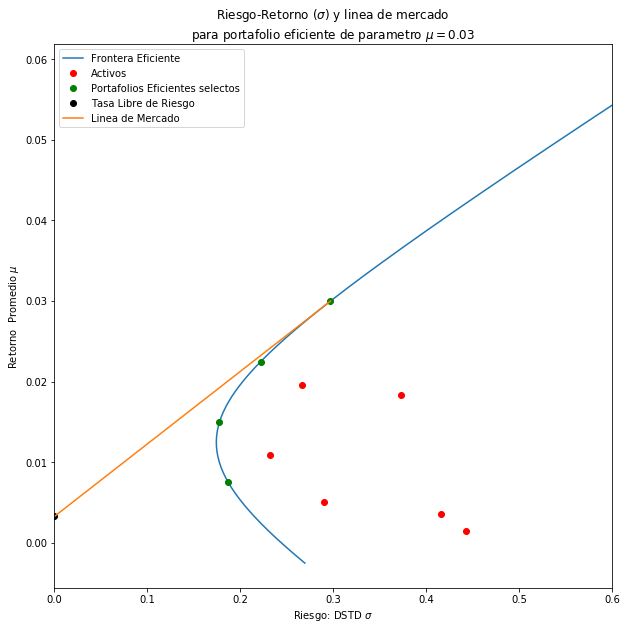

In [100]:
mus = np.linspace(-0.0025, 3*np.max(retProm), 200)
stdFront = np.sqrt((A*mus**2 - 2*mus*B + C)/D)

    # CUARTO PORTAFOLIO 

i = 3 #Indice para el portafolio actual
mu = musElegidos[i]
port = portElegidos[i]
var = varPort(port)
std = np.sqrt(var)
tau = tauMu(mu)
    
print("El portafolio eficiente para el cual se está graficando su línea de mercado y tasa libre de riesgo es:", 
      xOptMu(musElegidos[i]))
print("El cual tiene un rendimiento promedio de: ", mu, 
      "una varianza de", var,
      "y le corresonde una tasa libre de riesgo de", tau)


plt.figure(figsize = (10,10))
plt.title("Riesgo-Retorno ($\sigma$) y linea de mercado \npara portafolio eficiente de parametro $\mu=$" + str(mu))

plt.xlabel("Riesgo: DSTD $\sigma$")
plt.ylabel("Retorno  Promedio $\mu$")

plt.xlim(left = 0, right = 0.6)

# Frontera eficiente
plt.plot(stdFront, mus)

# Activos elegidos
plt.plot(np.sqrt(varianzas), retProm, 'ro') 

# 4 Portafolios Eficientes
plt.plot(np.sqrt(varElegidos), musElegidos, 'go')

# LINEA DE MERCADO Y CORTE CON EL EJE DE RENDIMIENTOS: TASA LIBRE DE RIESGO
plt.plot([0], [tau], 'ko')
plt.plot([0, np.sqrt(var)], [tau, mu])

plt.legend(("Frontera Eficiente", "Activos", "Portafolios Eficientes selectos", 
            "Tasa Libre de Riesgo", "Linea de Mercado"), loc = "upper left")